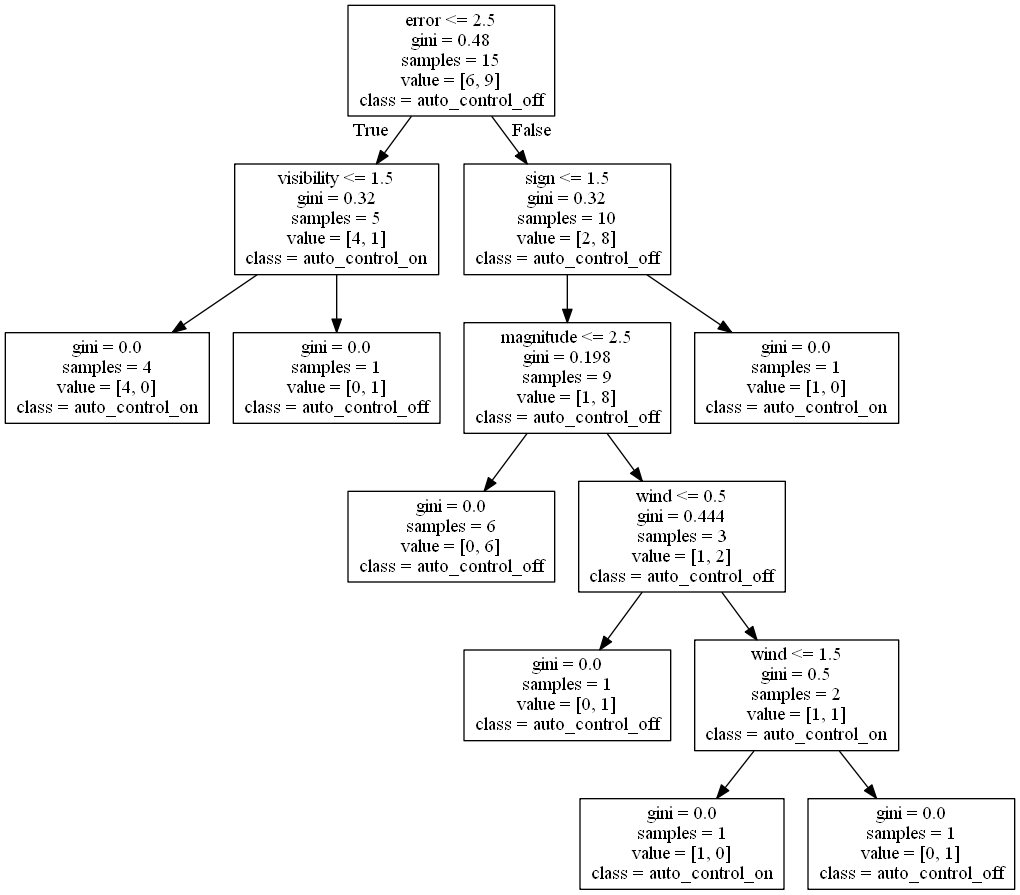

In [5]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler,scale
from sklearn import tree





data = pd.read_csv('data/shuttle-landing-control.csv',names=['auto_control','stability','error','sign','wind','magnitude','visibility'])

## |---------- Data Set Properties ------------|
#  |----- Value Map: 2 = True / 1 = False -----|
#  |------ Missing value: 0 -------------------|



## replacing missing values '*' with 0
data = data.replace('*',0)
## Always be aware of data type of a column, it can create error or unchange value when condition applied or other proccessing task applied.
## Converting data types into homogeneus element
data=data.astype('int')

features = data.iloc[:,1:]
## Scalling has no effect on this data,
#Assuming that it is most of few categorical data
#features = StandardScaler().fit_transform(features)
target = data.iloc[:,0]


clf = tree.DecisionTreeClassifier()
clf.fit(features,target)
clf.score(features,target)





from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_names = ['stability','error','sign','wind','magnitude','visibility']
target_names = ['auto_control_on','auto_control_off']
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  


from IPython.display import display
display(Image(graph.create_png()))
